In [102]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [103]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


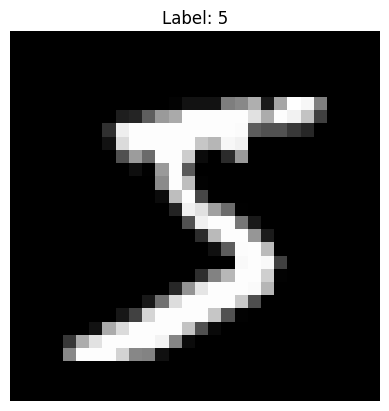

In [104]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray") # cmap="gray" to make it balck & white
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

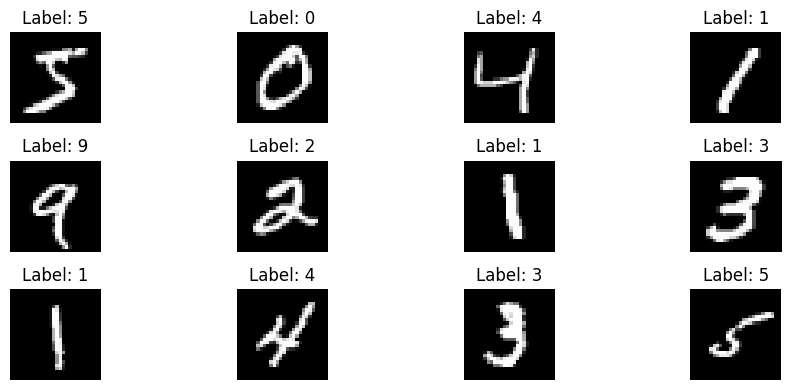

In [105]:
import matplotlib.pyplot as plt

num_images = 12
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


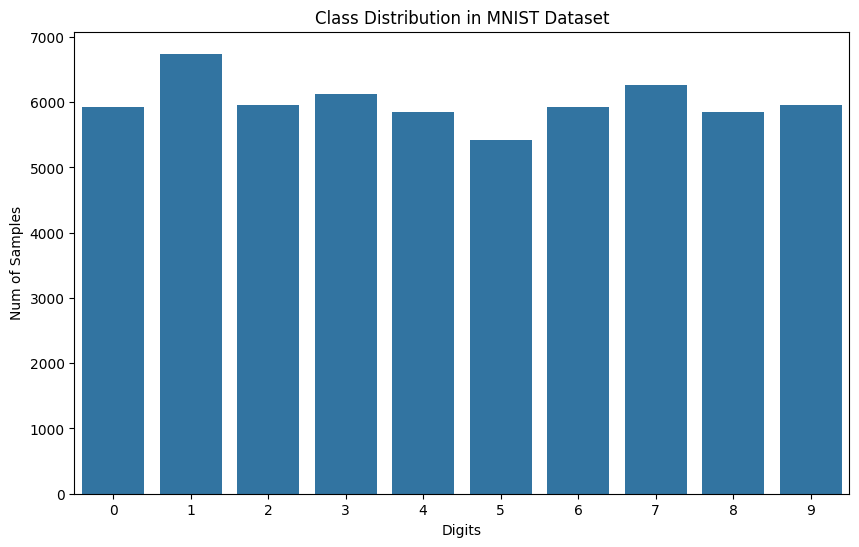

In [106]:
import seaborn as sns
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title("Class Distribution in MNIST Dataset")
plt.xlabel("Digits")
plt.ylabel("Num of Samples")
plt.xticks(rotation=0) # force them to be horizontal
plt.show()

In [107]:
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\neszm\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [108]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

base_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#base_model.fit(x_train, y_train, epochs=5)
base_history = base_model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8806 - loss: 0.4249 - val_accuracy: 0.9578 - val_loss: 0.1407
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9647 - loss: 0.1219 - val_accuracy: 0.9696 - val_loss: 0.1014
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0780 - val_accuracy: 0.9737 - val_loss: 0.0868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9835 - loss: 0.0539 - val_accuracy: 0.9745 - val_loss: 0.0810
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0415 - val_accuracy: 0.9648 - val_loss: 0.1090


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


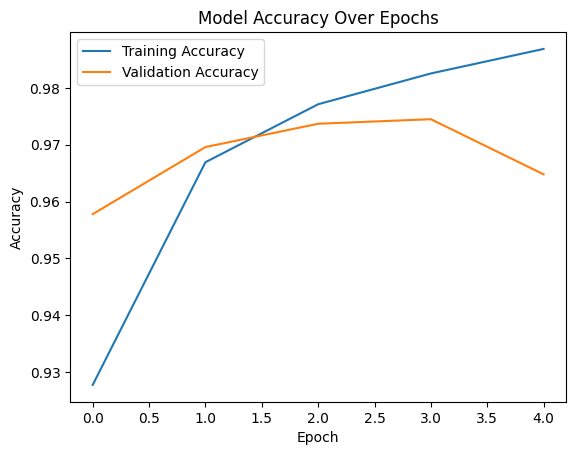

In [109]:
print(base_history.history.keys())

plt.plot(base_history.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in base_history.history:
    plt.plot(base_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [110]:
CNNmodel = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\neszm\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [111]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

CNNmodel.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#CNNmodel.fit(x_train, y_train, epochs=5)
CNN_history = CNNmodel.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5658 - loss: 1.5641 - val_accuracy: 0.8851 - val_loss: 0.4213
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8864 - loss: 0.4037 - val_accuracy: 0.9073 - val_loss: 0.3350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8975 - loss: 0.3447 - val_accuracy: 0.9130 - val_loss: 0.3085
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9056 - loss: 0.3215 - val_accuracy: 0.9145 - val_loss: 0.2961
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9098 - loss: 0.3050 - val_accuracy: 0.9157 - val_loss: 0.2894


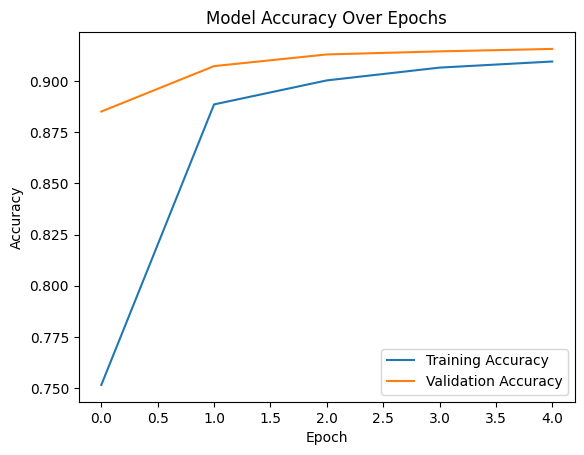

In [112]:
plt.plot(CNN_history.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history.history:
    plt.plot(CNN_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

what if we run them for longer does that help?

In [113]:
base_history_lt = base_model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4051 - loss: 2.1362 - val_accuracy: 0.7142 - val_loss: 1.4365
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7572 - loss: 1.1871 - val_accuracy: 0.8505 - val_loss: 0.6552
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8586 - loss: 0.5905 - val_accuracy: 0.8947 - val_loss: 0.4231
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8901 - loss: 0.4113 - val_accuracy: 0.9090 - val_loss: 0.3417
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9050 - loss: 0.3427 - val_accuracy: 0.9129 - val_loss: 0.3096
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9123 - loss: 0.3089 - val_accuracy: 0.9182 - val_loss: 0.2833
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9184 - loss: 0.2891 - val_accuracy: 0.9201 - val_loss: 0.2692
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9223 - loss: 0.2743 - 

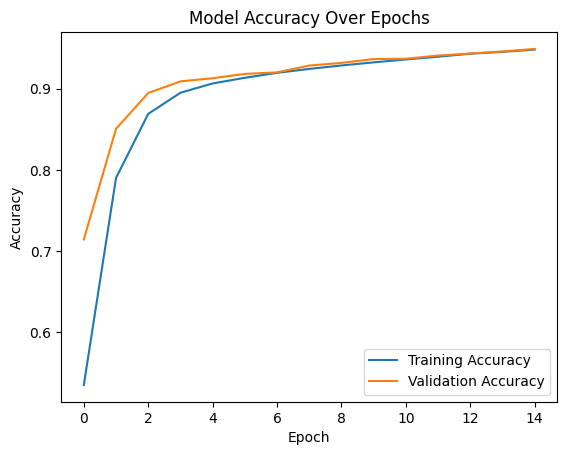

In [114]:
plt.plot(base_history_lt.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in base_history_lt.history:
    plt.plot(base_history_lt.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [115]:
CNN_history_lt = CNNmodel.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test) # for val accuracy
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9126 - loss: 0.3005 - val_accuracy: 0.9154 - val_loss: 0.2878
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9134 - loss: 0.2980 - val_accuracy: 0.9171 - val_loss: 0.2805
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9156 - loss: 0.2938 - val_accuracy: 0.9189 - val_loss: 0.2792
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9174 - loss: 0.2902 - val_accuracy: 0.9199 - val_loss: 0.2767
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9165 - loss: 0.2860 - val_accuracy: 0.9203 - val_loss: 0.2736
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9184 - loss: 0.2793 - val_accuracy: 0.9218 - val_loss: 0.2715
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9209 - loss: 0.2780 - val_accuracy: 0.9201 - val_loss: 0.2749
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9215 - loss: 0.2

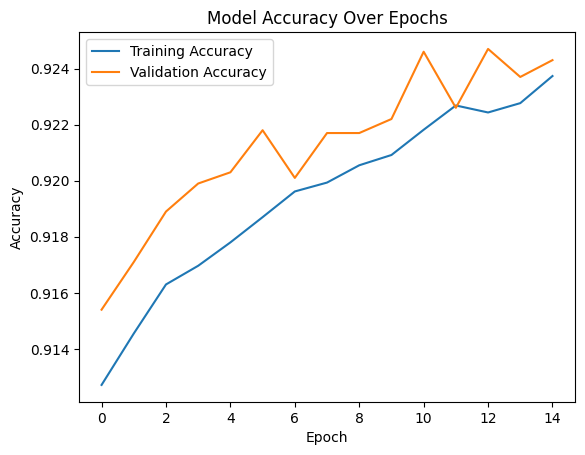

In [116]:
plt.plot(CNN_history_lt.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history_lt.history:
    plt.plot(CNN_history_lt.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Extra visualizations on how the machine identifies the numbers

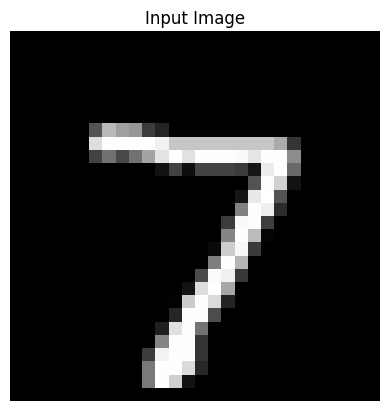

In [117]:
img = x_test[0] # first image from test set
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

In [118]:
pred = np.argmax(CNNmodel.predict(img[np.newaxis, ...]))
print(f"Predicted class: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted class: 7


In [119]:
for i, layer in enumerate(CNNmodel.layers):
    print(i, layer.name)

0 reshape_29
1 conv2d_2
2 max_pooling2d_2
3 flatten_29
4 dense_32


In [ ]:
import tensorflow as tf

# i had problems showingcasing anything from my previous models due to some unknown errors, so i recreated the model here*
#CNNmodel = keras.Sequential([
#    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
#    keras.layers.Conv2D(32, (3, 3), activation="relu"),
#    keras.layers.MaxPooling2D((2, 2)),
#    keras.layers.Flatten(),
#    keras.layers.Dense(10, activation="softmax")
#])

inputs = tf.keras.Input(shape=(28, 28), name="input_layer")
x = tf.keras.layers.Reshape((28, 28, 1))(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="valid", name="conv1")(x) # valid padding to be the same as the original one
x = tf.keras.layers.MaxPooling2D((2, 2), name="pool1")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

functional_model = tf.keras.Model(inputs=inputs, outputs=outputs)
functional_model.set_weights(CNNmodel.get_weights())


* *Apparently sequential models cannot do this line "activation_model = tf.keras.Model(inputs=functional_model.input, outputs=layer_outputs)"
because the tensors are "skipped" when they are made in sequential models but when they are explicity made with tensors as i did now they work well

After some consideration i decided to not commit my tries because whatever I tried it simply didn't work so I just gave up with trying it

In [121]:
target_digit = 6
indices = np.where(y_train == target_digit)[0] # get the first digit for whatever digit i want
img = x_train[indices[0]]

layer_outputs = [functional_model.get_layer("conv1").output]
activation_model = tf.keras.Model(inputs=functional_model.input, outputs=layer_outputs)
activations = activation_model.predict(img[np.newaxis, ...], verbose=0)[0]

activity_per_filter = np.sum(activations, axis=(0, 1)) #activity is all the pixel values summed up

top_indices = np.argsort(activity_per_filter)[::-1][:10] # top 10 most used filters

print(f"10 most active filters: {top_indices}")
print(f"Activity values: {activity_per_filter[top_indices]}")

10 most active filters: [ 0 17 24 27 15  6  8  7  2 25]
Activity values: [56.44174  17.184132 15.954667 14.91059  14.698644 14.084126 14.03382
 14.026698 13.606118 13.576701]


Let's see visually 

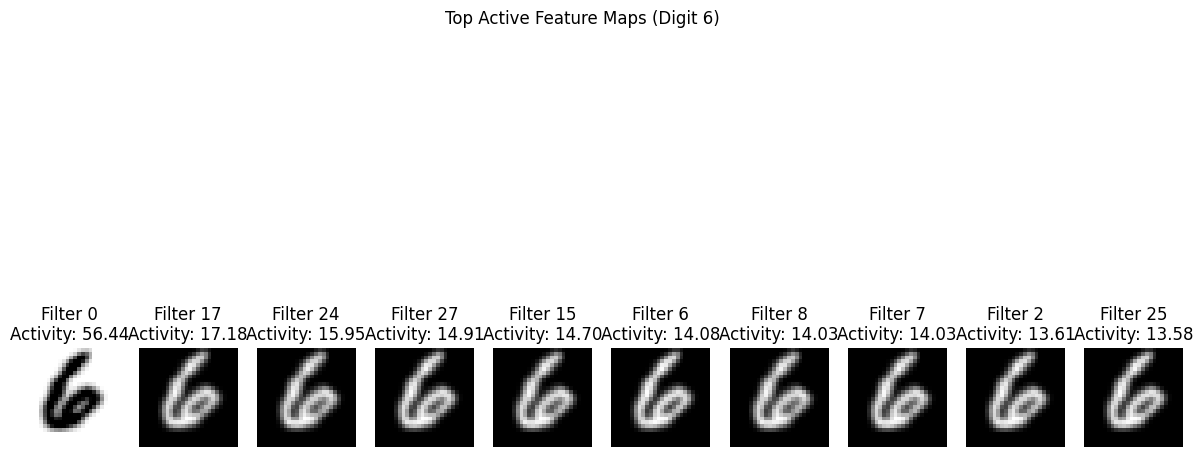

In [122]:
fig, axes = plt.subplots(1, 10, figsize=(15, 8))
for plot_idx, filter_idx in enumerate(top_indices):
    ax = axes[plot_idx]
    feature_map = activations[:, :, filter_idx]
    
    # only get those that are actually used + normalize them
    if feature_map.max() > 0:
        feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    
    ax.imshow(feature_map, cmap="gray")
    ax.set_title(f"Filter {filter_idx}\nActivity: {activity_per_filter[filter_idx]:.2f}")
    ax.axis("off")

plt.suptitle(f"Top Active Feature Maps (Digit {target_digit})")
plt.show()

Since all of them look the same lets see if the kernels that go through them are also the same or not

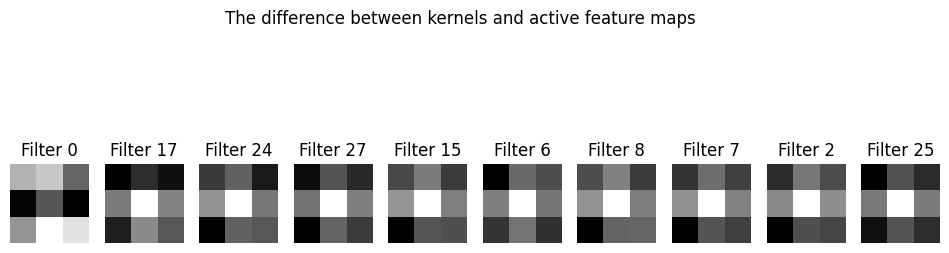

In [ ]:
weights = CNNmodel.layers[1].get_weights()[0] # get all weights from the first Conv2D layer

fig, axes = plt.subplots(1, 10, figsize=(12, 4))
for i, idx in enumerate(top_indices):
    ax = axes[i]
    # get the specific 3x3 kernel for this filter
    kernel = weights[:, :, 0, idx]
    kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    
    ax.imshow(kernel_norm, cmap="gray")
    ax.set_title(f"Filter {idx}")
    ax.axis("off")

plt.suptitle("The difference between kernels and active feature maps")
plt.show()